In [2]:
import python_speech_features as mfcc
import os
import numpy as np
import pandas as pd
import librosa
import pickle

#df_features = pd.read_csv('./mfcc_es_mx.csv')
df_features = pd.read_csv('mfcc_features.csv')
df_features = df_features.drop(['Unnamed: 0'],axis=1)
df_features.accent.value_counts()

España             74992
México             15448
Andino             11699
Rioplatense        10621
Caribe              7661
América central     5565
Chileno             3918
Name: accent, dtype: int64

In [3]:
df_es = df_features[df_features['accent']=='España'][:100]
df_mx = df_features[df_features['accent']=='México'][:100]
#df_andino = df_features[df_features['accent']=='Andino'][:10000]
df_caribe = df_features[df_features['accent']=='Caribe'][:100]
#df_rp = df_features[df_features['accent']=='Rioplatense'][:7000]

# Multi accent
#df_features = pd.concat([df_es,df_mx,df_andino,df_caribe,df_rp])
# España Mexico
#df_features = pd.concat([df_es,df_mx])

#España, Mexico, Andino
#df_features = pd.concat([df_es,df_mx,df_andino])

# España, Mexico, Caribe
#df_features = pd.concat([df_es,df_mx,df_caribe])

# España Andino
#df_features = pd.concat([df_es,df_andino])

#Mexico, Andino
#df_features = pd.concat([df_mx,df_andino])

# Mexico Caribe
#df_features = pd.concat([df_mx,df_caribe])

# Andino Caribe
#df_features = pd.concat([df_andino,df_caribe])




In [4]:
df_features.head(10)

,accent,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,México,1677.718785,1612.745697,3358.794145,-569.73413,128.704030,6.969439,8.466482,9.177470,2.072889,3.930073,-15.301613,-7.267760,10.540461,-2.708580,-6.161283,-2.961534
1,México,1619.961935,1550.527875,3185.866592,-536.89484,132.884670,14.828790,4.359267,3.613036,5.550890,5.075633,-21.225660,-12.947938,6.962500,-4.414804,-6.305440,-3.568841
2,México,1681.779715,1537.107681,3294.990647,-552.82900,133.168930,11.685370,-2.057885,-0.008511,1.975699,4.581186,-15.395591,-10.483634,6.167295,-1.988072,-3.231391,-0.737840
3,México,1845.987325,1679.445156,3671.334774,-546.22656,104.266120,16.771282,2.452711,4.185177,5.208492,0.743853,-16.445913,-9.057341,5.203734,-4.611980,-9.243179,-2.910447
4,México,1692.338682,1627.176669,3296.535326,-531.99520,128.998030,14.050061,7.137925,6.429101,6.554248,2.741421,-24.812666,-13.605760,7.323435,-4.648766,-6.041638,-3.786564
5,México,1906.452743,1781.315491,3908.414910,-533.07600,94.572754,15.389073,1.517419,4.039723,10.346470,4.913716,-15.144900,-5.900147,7.810393,-0.940329,-3.321784,-2.439012
6,México,1836.343905,1684.804924,3626.875825,-551.13220,109.378530,9.658978,1.282573,4.927755,7.232190,5.861974,-13.803307,-6.595472,8.740381,-1.375478,-5.493696,-3.963107
7,México,1630.288864,1632.550898,3292.842742,-540.81460,115.387955,13.276953,1.465407,6.269496,9.846820,3.324294,-17.829939,-6.979830,6.439206,-4.904841,-5.489675,-2.564125
8,América central,1800.341361,1543.421179,3421.153317,-559.15234,137.878810,-3.709019,4.905030,9.202734,-11.071607,-0.768194,-3.437903,-5.906492,0.358307,-10.410999,-11.663369,-6.084077
9,América central,1764.275554,1408.889111,3312.314619,-528.90220,105.784150,2.831367,4.334366,10.648993,-1.812410,-1.565997,-5.132945,-0.072501,4.571034,-8.296042,-9.127356,-5.072220


In [5]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, 0]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y, encoder = get_labels(df_features)
classes = encoder.classes_
print("Before encoding:", df_features.iloc[0].values[0])
print("\nAfter encoding:", y[0])
print("\nClasses:", classes)

Before encoding: México

After encoding: 5

Classes: ['América central' 'Andino' 'Caribe' 'Chileno' 'España' 'México'
 'Rioplatense']


In [6]:
from sklearn.preprocessing import StandardScaler

def scale_features(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data.iloc[:, 1:], dtype = float))
    # with data.iloc[:, 0:-1] we don't consider the label column
        
    return scaled_data, scaler

x, scaler = scale_features(df_features)

In [7]:
import matplotlib.pyplot as plt

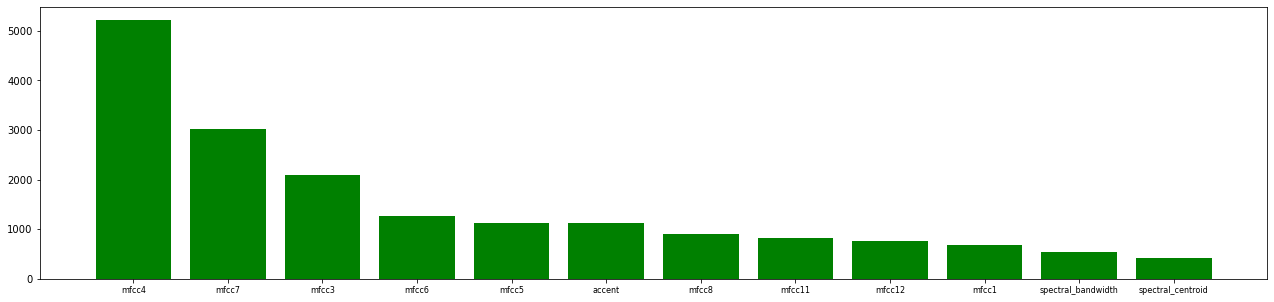

<Figure size 432x288 with 0 Axes>

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

n_features = 12

f_selector = SelectKBest(f_classif, k=n_features).fit(x, y)
X_new = f_selector.transform(x)
scores = f_selector.scores_

indices = np.argsort(scores)[::-1]

features = []
for i in range(n_features):
    features.append(df_features.columns[indices[i]])
    
plt.figure(figsize=(22, 5))
plt.bar(features, scores[indices[range(n_features)]], color='g')
plt.xticks(fontsize=8)
plt.show()

plt.savefig('features.png')

In [9]:
x[0]

array([ 0.05668458,  0.19577964,  0.19984219, -2.5768913 , -0.27833152,
        0.70722863, -0.87747769, -1.43718651,  0.3458848 , -0.4546896 ,
       -1.778612  , -0.0401586 ,  1.22660178,  0.66340131, -0.74945624,
       -0.70482206])

In [10]:
X_new[0]

array([ 0.05668458,  0.19577964,  0.19984219, -0.27833152, -0.87747769,
       -1.43718651,  0.3458848 , -0.4546896 , -1.778612  , -0.0401586 ,
       -0.74945624, -0.70482206])

In [11]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix (without normalization)"
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title(title)

    thresh = cm.max() / 2.
    fmt = "{:0.2f}" if normalize else "{:d}"
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, fmt.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

#model = SVC(C=100, gamma='scale', probability = True)
model = SVC(probability = True)

# Classes: España, Mexico, Andino, Caribe, Rioplatense

#clf = OneVsOneClassifier(model,n_jobs=1)
clf = OneVsOneClassifier(model)
clf.fit(X_train, y_train)

#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)



In [ ]:
y_pred = clf.predict(X_test)

#compare what we know is true with the prediction

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cm, classes=classes)

plt.grid(False)
plt.show()

plt.savefig('cm.png')

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize


# Binarize ypreds with shape (n_samples, n_classes)
y_pred = label_binarize(y_pred, classes=[0,1,2])


roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')

#roc_auc_score(y_test, y_pred , multi_class='ovo')

#roc_auc_score(y_test, y_pred)

In [ ]:
# Multiclass model using OVO Classifier SVM

# MULTI
# MULTI_OVO
# ES_MX_ANDINO

model_name = 'ES_MX_CARIBE_OVO'

model_path = './models/'+model_name+'/'

pickle.dump(encoder, open(model_path + 'encoder.pkl','wb'))
pickle.dump(scaler, open(model_path + 'scaler.pkl','wb'))
pickle.dump(f_selector, open(model_path + 'f_selector.pkl','wb'))
pickle.dump(clf, open(model_path + 'model.pkl','wb'))

We have to get the mfcc features when we want to make a new prediction. 
Be mindful that the feature selector should be applied to this new file, because it will keep only the relevant features.

Create a pipeline for new predictions

In [ ]:
df_new_data = pd.read_csv('./preprocessed/train.csv')

In [ ]:
ds_path = "./clips/"

train_csv = df_new_data

#this function is used to extract audio frequency features
def feature_extraction(filename, sampling_rate=48000, mfcc_num=20):
    path = "{}{}".format(ds_path, filename)
    features = list()
    audio, _ = librosa.load(path, sr=sampling_rate)
    
    accents = train_csv[train_csv['path'] == filename].accents.values[0]
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    features.append(accents)
    features.append(spectral_centroid)
    features.append(spectral_bandwidth)
    features.append(spectral_rolloff)
    
    # Extract mfcc features. First experiment
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=mfcc_num) # it returns 20 by default.
    for el in mfcc:
        features.append(np.mean(el))
    
    return features

In [ ]:
inx = 18765
df_new_data.iloc[inx]

In [ ]:
from IPython.display import Audio 
path = './clips/'+ df_new_data.iloc[inx]['path']

Audio(path, autoplay=True)

In [ ]:
file_path = df_new_data.iloc[inx]['path']

file_features = feature_extraction(file_path,mfcc_num = 13)
print("features: ", file_features)

# This data needs to be scaled!!!!
# Next, use the feature selector transform


In [ ]:

file_features = scaler.transform([file_features[1:]])

X_new_features = f_selector.transform(file_features)

X_new_features

In [ ]:
print(classes)
#model.predict(X_new_features)
prediction = clf.predict(X_new_features)

print(classes[prediction[0]])


In [ ]:
df_new_data.iloc[inx]['path']